#  Medicare Inpatient Hospitals Dataset — Data Description

---

## Provider Information
- **provider_id** → CMS Certification Number (unique hospital ID)  
- **provider_name** → Name of the hospital  
- **city** → City where the hospital is located  
- **state** → Full state name (from CMS feed)  
- **state_fips** → Numeric FIPS code for the state  
- **zip_code** → 5-digit ZIP code of the hospital  
- **state_abbr** → Two-letter state abbreviation  
- **ruca_code** → Rural–Urban Commuting Area code (numeric classification)  
- **ruca_desc** → Rural/urban descriptor (text label for `ruca_code`)  

---

##  Medical Procedure Information
- **drg_code** → Diagnosis Related Group (DRG) numeric code  
- **drg_desc** → Description of the DRG (e.g., *Major Joint Replacement*)  

---

##  Payment and Utilization Information
- **total_discharges** → Number of times this procedure was performed at that hospital  
- **avg_submitted_charge** → Average amount the hospital billed for the procedure  
- **avg_total_payment** → Average amount actually paid (Medicare + patient + other insurers)  
- **avg_medicare_payment** → Portion of the total payment that came directly from Medicare  

---

 **In short:**  
Each row = one **hospital + DRG procedure + payment summary**, linking provider info, procedure type, and real-world cost data.


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
df=pd.read_csv('/content/Medicare_IP_Hospitals_by_Provider_and_Service_2023.csv',encoding="latin-1")
copy=df.copy()

## Intial data exploration and Cleaning

In [58]:
df.shape

(146427, 15)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146427 entries, 0 to 146426
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ï»¿Rndrng_Prvdr_CCN        146427 non-null  int64  
 1   Rndrng_Prvdr_Org_Name      146427 non-null  object 
 2   Rndrng_Prvdr_City          146427 non-null  object 
 3   Rndrng_Prvdr_St            146427 non-null  object 
 4   Rndrng_Prvdr_State_FIPS    146427 non-null  int64  
 5   Rndrng_Prvdr_Zip5          146427 non-null  int64  
 6   Rndrng_Prvdr_State_Abrvtn  146427 non-null  object 
 7   Rndrng_Prvdr_RUCA          146423 non-null  float64
 8   Rndrng_Prvdr_RUCA_Desc     146423 non-null  object 
 9   DRG_Cd                     146427 non-null  int64  
 10  DRG_Desc                   146427 non-null  object 
 11  Tot_Dschrgs                146427 non-null  object 
 12  Avg_Submtd_Cvrd_Chrg       146427 non-null  object 
 13  Avg_Tot_Pymt_Amt           14

In [60]:
df = df.rename(columns={
    "ï»¿Rndrng_Prvdr_CCN": "provider_id",
    "Rndrng_Prvdr_Org_Name": "provider_name",
    "Rndrng_Prvdr_City": "city",
    "Rndrng_Prvdr_St": "state",
    "Rndrng_Prvdr_State_FIPS": "state_fips",
    "Rndrng_Prvdr_Zip5": "zip_code",
    "Rndrng_Prvdr_State_Abrvtn": "state_abbr",
    "Rndrng_Prvdr_RUCA": "ruca_code",
    "Rndrng_Prvdr_RUCA_Desc": "ruca_desc",
    "DRG_Cd": "drg_code",
    "DRG_Desc": "drg_desc",
    "Tot_Dschrgs": "total_discharges",
    "Avg_Submtd_Cvrd_Chrg": "avg_submitted_charge",
    "Avg_Tot_Pymt_Amt": "avg_total_payment",
    "Avg_Mdcr_Pymt_Amt": "avg_medicare_payment"
})


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146427 entries, 0 to 146426
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   provider_id           146427 non-null  int64  
 1   provider_name         146427 non-null  object 
 2   city                  146427 non-null  object 
 3   state                 146427 non-null  object 
 4   state_fips            146427 non-null  int64  
 5   zip_code              146427 non-null  int64  
 6   state_abbr            146427 non-null  object 
 7   ruca_code             146423 non-null  float64
 8   ruca_desc             146423 non-null  object 
 9   drg_code              146427 non-null  int64  
 10  drg_desc              146427 non-null  object 
 11  total_discharges      146427 non-null  object 
 12  avg_submitted_charge  146427 non-null  object 
 13  avg_total_payment     146427 non-null  object 
 14  avg_medicare_payment  146427 non-null  object 
dtype

In [62]:
df.isna().sum().reset_index().rename(columns={"index": "column", 0: "missing_values"})


,column,missing_values
0,provider_id,0
1,provider_name,0
2,city,0
3,state,0
4,state_fips,0
5,zip_code,0
6,state_abbr,0
7,ruca_code,4
8,ruca_desc,4
9,drg_code,0


In [63]:
df = df.drop(['provider_id','provider_name', 'state_fips', 'zip_code', 'state', 'ruca_desc','city', 'drg_code'], axis=1)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146427 entries, 0 to 146426
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   state_abbr            146427 non-null  object 
 1   ruca_code             146423 non-null  float64
 2   drg_desc              146427 non-null  object 
 3   total_discharges      146427 non-null  object 
 4   avg_submitted_charge  146427 non-null  object 
 5   avg_total_payment     146427 non-null  object 
 6   avg_medicare_payment  146427 non-null  object 
dtypes: float64(1), object(6)
memory usage: 7.8+ MB


In [65]:
# List of columns to clean
money_columns = ['avg_submitted_charge', 'avg_total_payment', 'avg_medicare_payment']

# Loop through each column
for col in money_columns:
    df[col] = df[col].replace({'\$': '', ',': ''}, regex=True)
    df[col] = pd.to_numeric(df[col], errors='coerce') # 'coerce' will turn any errors into missing values

<>:6: SyntaxWarning: invalid escape sequence '\$'
<>:6: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-2167559519.py:6: SyntaxWarning: invalid escape sequence '\$'
  df[col] = df[col].replace({'\$': '', ',': ''}, regex=True)


In [66]:
# Clean and convert the total_discharges column
df['total_discharges'] = df['total_discharges'].replace({',': ''}, regex=True)
df['total_discharges'] = pd.to_numeric(df['total_discharges'], errors='coerce')

In [67]:
mean_ruca = df['ruca_code'].mean()
df['ruca_code'] = df['ruca_code'].fillna(mean_ruca)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146427 entries, 0 to 146426
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   state_abbr            146427 non-null  object 
 1   ruca_code             146427 non-null  float64
 2   drg_desc              146427 non-null  object 
 3   total_discharges      146427 non-null  int64  
 4   avg_submitted_charge  146427 non-null  float64
 5   avg_total_payment     146427 non-null  float64
 6   avg_medicare_payment  146427 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 7.8+ MB


In [70]:
df.describe()

,ruca_code,total_discharges,avg_submitted_charge,avg_total_payment,avg_medicare_payment
count,146427.000000,146427.000000,1.464270e+05,146427.000000,146427.000000
mean,1.751225,33.875754,9.079423e+04,18512.963019,15331.359444
std,6.222555,49.814354,1.200348e+05,21313.196905,18594.048967
min,1.000000,11.000000,3.368500e+03,1938.430000,180.290000
25%,1.000000,14.000000,3.526298e+04,8685.925000,6794.310000
50%,1.000000,20.000000,5.866857e+04,12830.710000,10548.180000
75%,1.000000,35.000000,1.042167e+05,20403.215000,16814.950000
max,99.000000,3210.000000,1.041893e+07,761738.780000,751479.040000


## Initial Insights from the CMS Dataset

An initial statistical summary of the cleaned CMS Inpatient Hospital data has provided several critical clues that will direct our feature engineering and modeling strategy.

* ### **Extreme Cost Outliers Dominate the Data**
    The most significant finding is the presence of extreme outliers in all cost-related columns. While **75% of procedures have an average total payment of $20,403 or less**, the **maximum recorded average payment is a staggering $761,738**. This massive skew indicates that a few highly specialized and expensive procedures are present, which will heavily influence any predictive model.

* ### **Data is Heavily Weighted Towards Urban Hospitals**
    The `ruca_code` (Rural-Urban Commuting Area code) reveals a strong bias in the dataset. The **median (`50%`) `ruca_code` is 1.0**, which corresponds to the most metropolitan areas. This tells us that our dataset is far more representative of urban healthcare costs than rural ones.

* ### **Vast Difference in Procedure Frequency**
    The `total_discharges` column shows a wide disparity between common and rare procedures. The **average procedure is performed about 34 times** at a given hospital. However, the **maximum is 3,210**, indicating that while most procedures are relatively infrequent, a few are extremely common. This "popularity" could be a useful feature for our model.

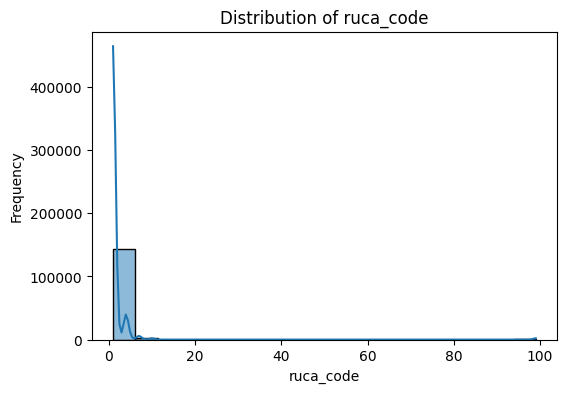

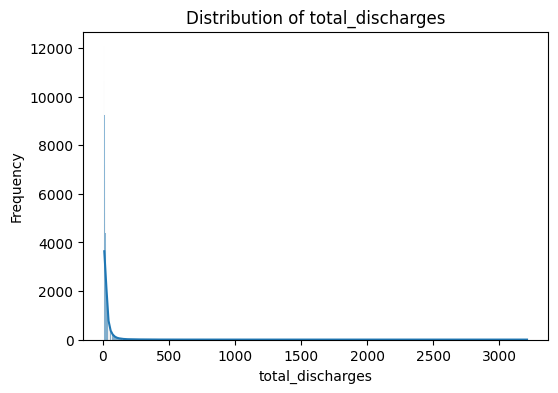

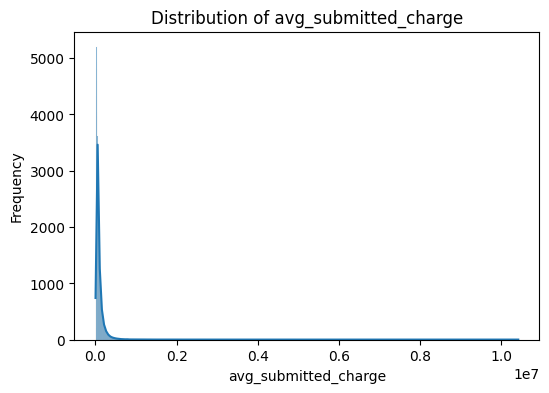

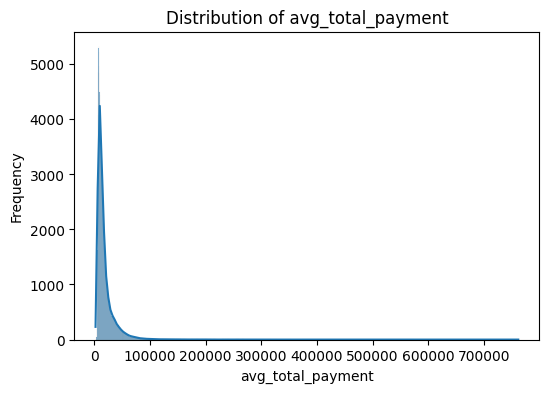

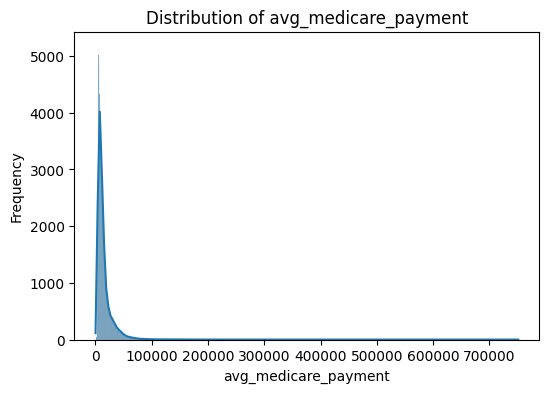

In [72]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

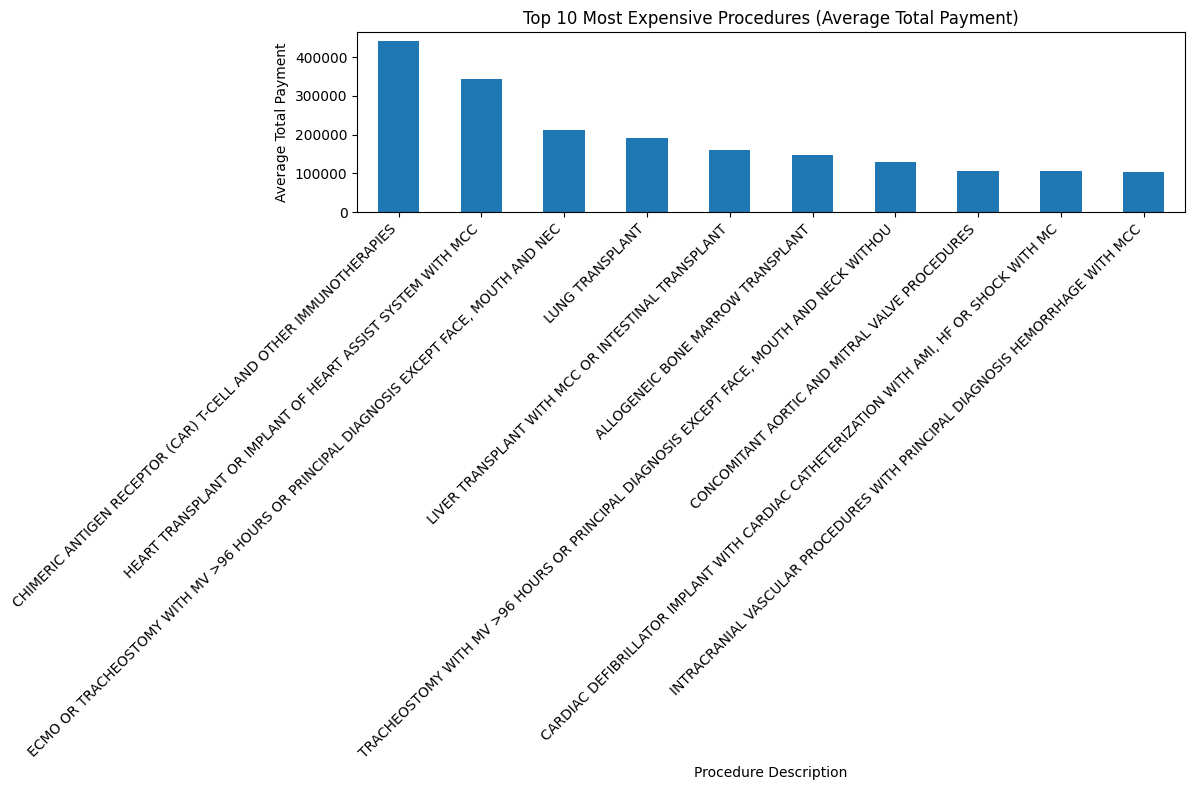

In [75]:
top_10_expensive_procedures = df.groupby('drg_desc')['avg_total_payment'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 8)) # Increased figure height
top_10_expensive_procedures.plot(kind='bar')
plt.title('Top 10 Most Expensive Procedures (Average Total Payment)')
plt.xlabel('Procedure Description')
plt.ylabel('Average Total Payment')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

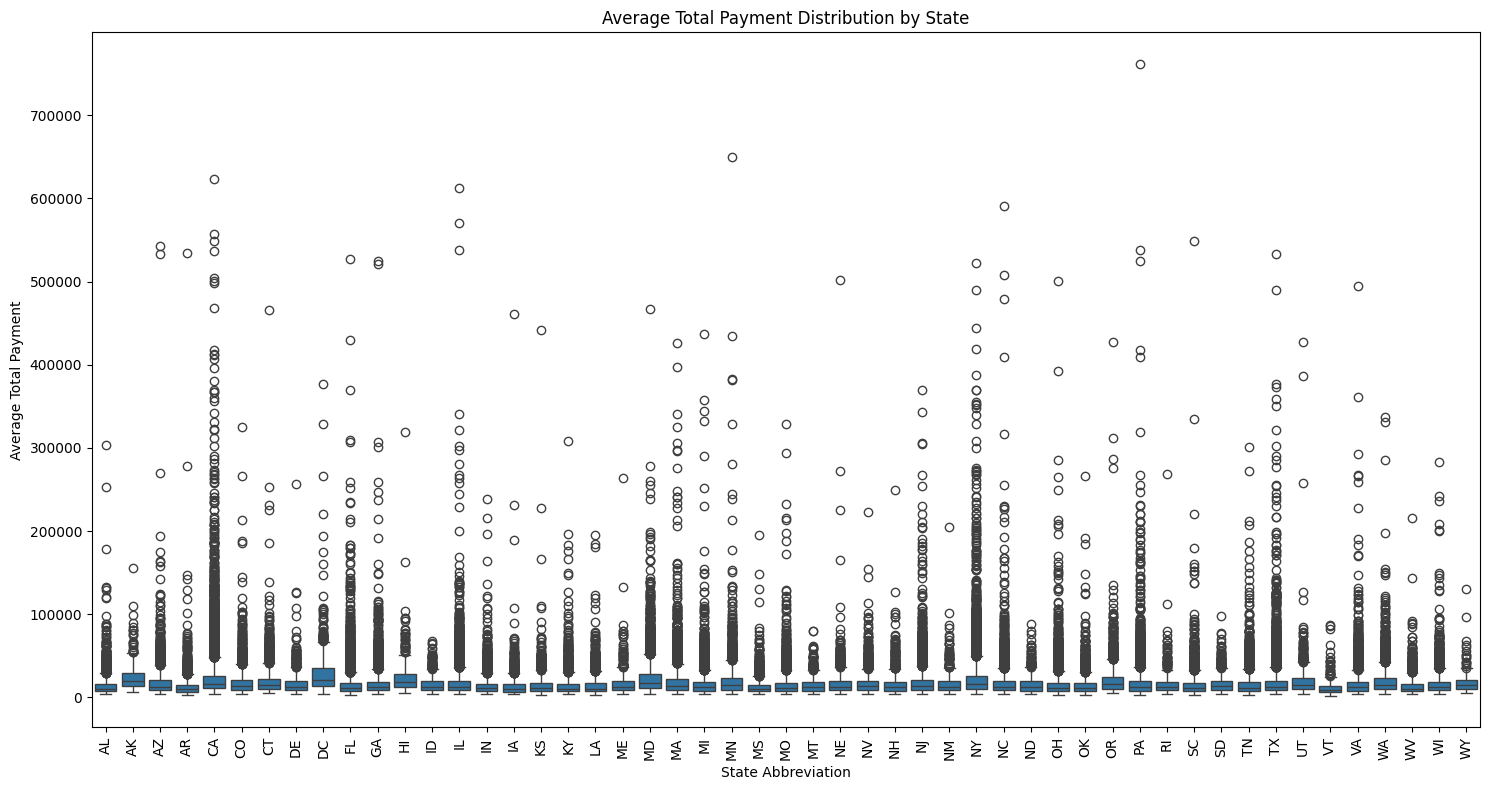

In [76]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='state_abbr', y='avg_total_payment', data=df)
plt.title('Average Total Payment Distribution by State')
plt.xlabel('State Abbreviation')
plt.ylabel('Average Total Payment')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

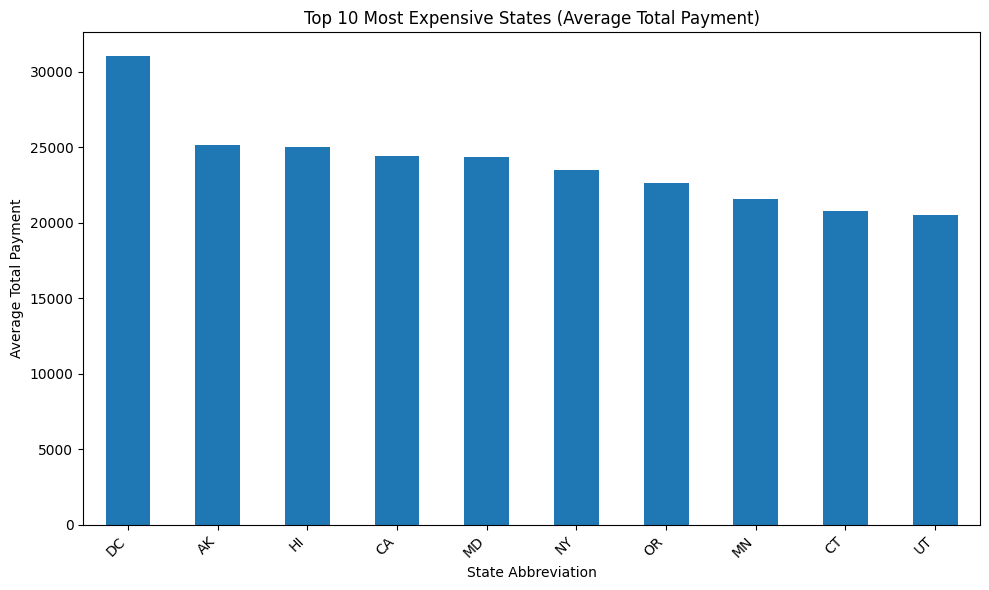

In [78]:
plt.figure(figsize=(10, 6))
top_10_expensive_states.plot(kind='bar')
plt.title('Top 10 Most Expensive States (Average Total Payment)')
plt.xlabel('State Abbreviation')
plt.ylabel('Average Total Payment')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [83]:
def categorize_procedure(drg_desc):
    """
    Categorizes a medical procedure based on keywords in its description.
    """
    # Convert to lowercase for easier matching
    drg_desc = drg_desc.lower()

    # 1. Major Surgeries / Intensive Care (Highest Cost)
    if 'transplant' in drg_desc or 'ecmo' in drg_desc or 'tracheostomy' in drg_desc:
        return 'Major Surgery/Intensive Care'

    # 2. Cardiology (Heart-related)
    elif 'cardiac' in drg_desc or 'heart' in drg_desc or 'valve' in drg_desc:
        return 'Cardiology'

    # 3. Orthopedics (Bones and Joints)
    elif 'joint' in drg_desc or 'spinal fusion' in drg_desc or 'back & neck' in drg_desc:
        return 'Orthopedics'

    # 4. Neurology (Brain and Nervous System)
    elif 'nervous system' in drg_desc or 'craniotomy' in drg_desc:
        return 'Neurology'

    # 5. Pulmonary (Lungs and Breathing)
    elif 'pulmonary' in drg_desc or 'respiratory' in drg_desc:
        return 'Pulmonary'

    # 6. Septicemia (Major Infections)
    elif 'septicemia' in drg_desc:
        return 'Infections'

    # If none of the above, classify as Other
    else:
        return 'Other'

# --- Apply the new, improved function ---
df['procedure_category'] = df['drg_desc'].apply(categorize_procedure)

# --- Check the new distribution ---
print("Distribution of new procedure categories:")
print(df['procedure_category'].value_counts())

Distribution of new procedure categories:
procedure_category
Other                           98868
Cardiology                      15891
Pulmonary                       12227
Orthopedics                      8133
Infections                       5810
Neurology                        4395
Major Surgery/Intensive Care     1103
Name: count, dtype: int64
